# **Norm-Conserving Pseudopotentials**

**Authors:** Dou Du, Taylor James Baird and Giovanni Pizzi

<i class="fa fa-home fa-2x"></i><a href="../index.ipynb" style="font-size: 20px"> Go back to index</a>

**Source code:** https://github.com/osscar-org/quantum-mechanics/blob/master/notebook/band-theory/pseudopotential.ipynb

The pseudopotential method is a technique employed to simplify the description of a system of interacting electrons and nuclei. It is used to construct an effective potential
that includes both the effects of a nucleus and of its core electrons,
allowing one to consider explicitly only the valence electrons.
This notebook illustrates a method of constructing norm-conserving pseudopotentials
and to display them interactively, together with the resulting pseudowavefunctions.

<hr style="height:1px;border:none;color:#cccccc;background-color:#cccccc;" />

## **Goals**

* Understand why pseudopotentials are needed.
* Learn how to construct pseudopotentials using Kerker's method.
* Examine the results for various values of the principal quantum number <em>n</em> and of the angular quantum number <em>l</em>.
* Examine the effect of changing the cutoff radius.

## **Background theory** 

[More on the background theory.](./theory/theory_pseudopotential.ipynb)

## **Tasks and exercises**

1. Investigate the role of the cutoff radius by varying the $R_c$ slider.
    
    <details>
    <summary style="color: red">Solution</summary>
        Move the slider for $R_c$ and press the button "Compute pseudopotential" to obtain 
        the results. Check if there are values for which no solutions can be found. 
        Inspect how different the pseudopotential is from the Coulomb potential.
    </details>

2. Investigate how the pseudopotential changes for different values of the quantum numbers
    
    <details>
    <summary style="color: red">Solution</summary>
        Try to construct the pseudopotential for various values of <em>n</em> and <em>l</em>.
        Check what happens when constructing a pseudopotential for a nodeless wavefunction 
        (e.g. $n=1$ and $l=0$, or $n=2$ and $l=1$).
    </details>

3. Why do we need pseudopotentials?
    
    <details>
    <summary style="color: red">Solution</summary>
        Wavefunction oscillates rapidly in the core region. In a plane-wave approach, 
        this would require a huge basis set (i.e., a huge number of plane waves) to 
        be described accurately. What is most relevant, however, is that while the 
        largest part of the contribution to the total energy of the system comes from 
        the core electrons, these electrons are essentially frozen and do not participate 
        in chemistry and the creation of bonds; the electronic structure is instead 
        determined by the valence electrons. Avoiding to treat explicitly core 
        electrons avoids that small relative errors on the core electrons completely 
        spoil the calculation of the energy of the full system and, in particular, 
        of the (small, but crucial) energy differences between different atomic 
        configurations or crystalline phases.
    </details>

4. What is the meaning of the norm-conservation condition?
    
    <details>
    <summary style="color: red">Solution</summary>
        The condition ensures that the total charge inside the cutoff radius $R_c$ is 
        correct. However, there are more profound consequences that are implied by 
        this condition: it turns out that imposing norm conservation implies also 
        that the first energy derivative of the logarithmic derivatives of the 
        all-electron wavefunction and the pseduowafevuntion agree at $R_c$. This 
        is a very important condition for the transferability of the pseudopotential. 
        It can be shown that this means that the true atom with its electrons and the
        pseudopotential generate the same phase shift when a plane wave is scattered 
        into a spherical wave. A detailed discussion can be found in Section 11.4 of 
        the book <a href="https://www.cambridge.org/ch/academic/subjects/physics/condensed-matter-physics-nanoscience-and-mesoscopic-physics/electronic-structure-basic-theory-and-practical-methods?format=PB&isbn=9780521534406" target="_blank">"Electronic Structure: 
        Basic Theory and Practical Methods"</a> by Richard M. Martin, Cambridge 
        University Press (2004).
    </details>

5. Are the pseudopotentials constructed with this method local?
    
    <details>
    <summary style="color: red">Solution</summary>
        As discussed earlier, we obtain a different pseudopotential for different 
        values of the quantum numbers <em>n</em> and <em>l</em>. Therefore, the 
        pseudopotential is not local (its action is not not just the product of 
        the same a single function $V^{PS}(r)$ times the wavefunction).
    </details>

<hr style="height:1px;border:none;color:#cccccc;background-color:#cccccc;" />

## Interactive visualization
(be patient, it might take a few seconds to load)

In [1]:
from sympy.physics.hydrogen import R_nl, E_nl
from sympy.abc import r
from sympy.functions import exp
from sympy import lambdify, diff, log
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers.solveset import linsolve
from ipywidgets import FloatSlider, Button, IntSlider, Layout, HBox, VBox, Label, Tab, Layout, Text
from scipy.optimize import newton
import matplotlib.gridspec as gridspec

%matplotlib widget

In [2]:
# sn: the slider to control the quantum number n
# sl: the slider to control the quantum number l
sn = IntSlider(value=3, min=1, max=5, description="$n$")
sl = IntSlider(value=0, min=0, max=sn.value-1, description="$l$")

labeln = Label(value="(principal quantum number)")
labell = Label(value="(angular quantum number)")

#init the quantum number n and l
n = sn.value
l = sl.value
# We consider a H atom, with charge +1
Z = 1

#ho: is the Hydrogen radial wavefunction
#Ea: is the eigenvalue
#rf: make the analytical formula numerically
ho = R_nl(n, l, r, Z=Z)
Ea = E_nl(n, Z=Z)
rf = lambdify(r, ho, "numpy")


def update_functions_and_plot():
    """Update the functions and then the plot.
    """
    global ho, Ea, rf
    ho = R_nl(n, l, r, Z=Z)
    # Check that the value of the radial wavefunction at large radius is positive
    # (i.e., that the wavefunction goes to zero from positive values as r->infinity)
    # If negative: flip it! (This is because due to the formula of the polynomial
    # that we want to use for r < R_c, $\Psi(R_c)R_c$ must be positive at R_c, and thus after R_c as well).
    # Because of the form of R_nl, the sign needs to be swapped if n-l is even.
    if (n - l) % 2 == 0:
        ho = -ho
    Ea = E_nl(n, Z=Z)
    rf = lambdify(r, ho, "numpy")
    update_plot()

def nvalue_change(c):
    """Observe the change of the sn and update plot.
    """
    global n
    n = c["new"]
    sl.value = 0
    sl.max = n - 1
    update_functions_and_plot()
    
sn.observe(nvalue_change, names="value")

def lvalue_change(c):
    """Observe the change of the sl and upate plot.
    """
    global l
    l = c["new"]
    update_functions_and_plot()

sl.observe(lvalue_change, names="value")

In [3]:
## NOTE: the widgets in this cell are currently not shown

text_l0 = Text(description = r"Lt. $\psi^{(0)}(r_c)$:")
text_l1 = Text(description = r"Lt. $\psi^{(1)}(r_c)$:")
text_l2 = Text(description = r"Lt. $\psi^{(2)}(r_c)$:")

text_r0 = Text(description = r"Rt. $\psi^{(0)}(r_c)$:")
text_r1 = Text(description = r"Rt. $\psi^{(1)}(r_c)$:")
text_r2 = Text(description = r"Rt. $\psi^{(2)}(r_c)$:")

cof_0 = Text(description = r"$\lambda_0$:")
cof_2 = Text(description = r"$\lambda_2$:")
cof_3 = Text(description = r"$\lambda_3$:")
cof_4 = Text(description = r"$\lambda_4$:")

def clear_texts():
    text_l0.value = ""
    text_l1.value = ""
    text_l2.value = ""
    text_r0.value = ""
    text_r1.value = ""
    text_r2.value = ""
    cof_0.value = ""
    cof_2.value = ""
    cof_3.value = ""
    cof_4.value = ""

output1 = VBox([HBox([text_l0, text_r0]), HBox([text_l1, text_r1]), HBox([text_l2, text_r2])]);
output2 = VBox([cof_0, cof_2, cof_3, cof_4])

tab = Tab(layout=Layout(width='700px'))
tab.children = [output1, output2]
tab.set_title(0, r"Continuity at Rc")
tab.set_title(1, r"Polynomial coeff.")

## Uncomment this if you want to also see some text boxes with the values of the wavefunction and its derivatives
## at the cutoff radius
#display(tab)

In [4]:
s_rc = FloatSlider(value = 21.0, min = 1.0, max = 50, description = "$R_c$", 
                   layout={'width':'300px'})

compute = Button(description="Compute pseudopotential", style={'description_width': 'initial'}, layout={'width':'200px'})


display(HBox([sn, labeln]), HBox([sl, labell]))
display(HBox([s_rc, compute]))

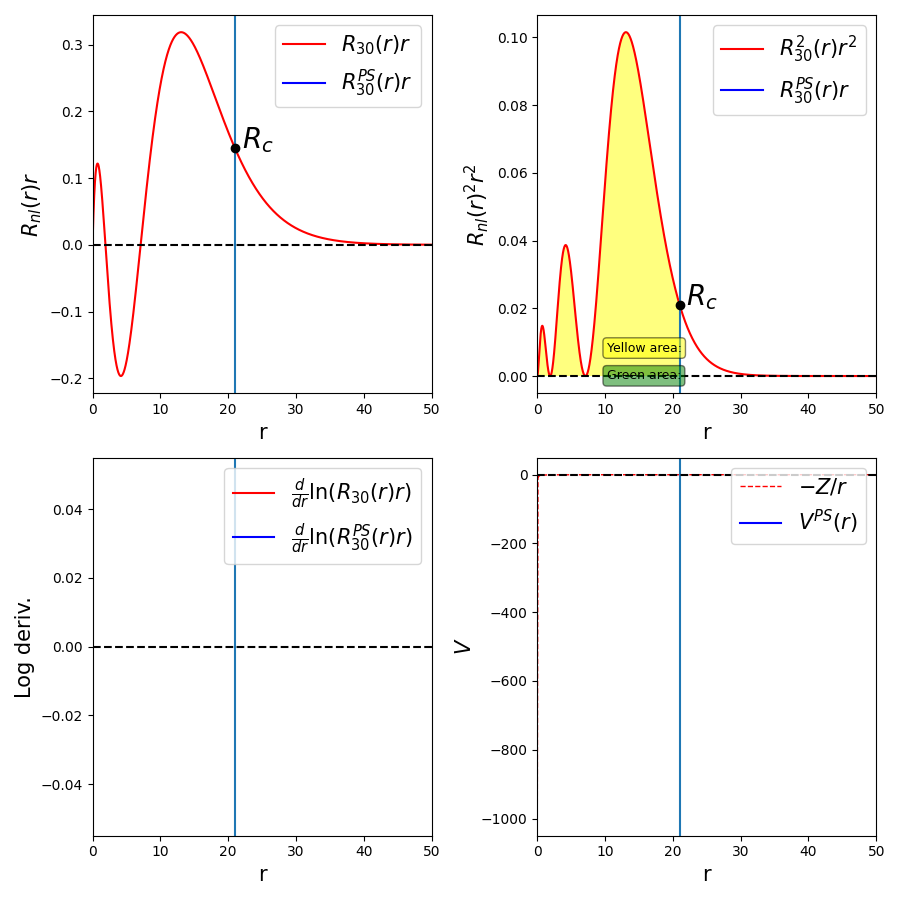

In [5]:
img = plt.figure(tight_layout=True, figsize=(9,9))
img.canvas.header_visible = False

gs = gridspec.GridSpec(2, 2)

ax1 = img.add_subplot(gs[0, 0])
ax2 = img.add_subplot(gs[0, 1])
ax3 = img.add_subplot(gs[1, 0]) # subplot for log derivatives
ax4 = img.add_subplot(gs[1, 1])

x1 = np.arange(0, 50.0, 0.01)
y1 = rf(x1)*x1

line_rho, = ax1.plot(x1, y1, 'r-', label="$R_{"+str(sn.value)+str(sl.value)+"}(r)r$")
#ax1.fill_between(x1, y1, 0, where=x1<s_rc.value, facecolor='yellow', alpha=0.5)
ax1.set_xlim([0, 50.0])

ax1.hlines(0, 0, 50, 'k','--')


# subplot for R^2r^2

x2 = np.arange(0, 50.0, 0.01)
y2 = (rf(x2)*x2)**2

line_rho2, = ax2.plot(x2, y2, 'r-', label="$R^2_{"+str(sn.value)+str(sl.value)+"}(r)r^2$")

ax2.fill_between(x2, y2, 0, where=x2<s_rc.value, facecolor='yellow', alpha=0.5)
ax2.set_xlim([0, 50.0])

ax2.hlines(0, 0, 50, 'k','--')

line_rc1 = ax1.axvline(s_rc.value)
line_pswf, = ax1.plot([],[],'b-', linewidth=1.5, label="$R^{PS}_{"+str(sn.value)+str(sl.value)+"}(r)r$")
ann_rc = ax1.annotate("$R_c$", xy=(s_rc.value + 1.0, rf(s_rc.value)*s_rc.value), fontsize=20)
point, = ax1.plot(s_rc.value, rf(s_rc.value)*s_rc.value, 'ko')

line_rc2 = ax2.axvline(s_rc.value)
line_pswf2, = ax2.plot([],[],'b-', linewidth=1.5, label="$R^{PS}_{"+str(sn.value)+str(sl.value)+"}(r)r$")
ann_rc2 = ax2.annotate("$R_c$", xy=(s_rc.value + 1.0, (rf(s_rc.value)*s_rc.value)**2), fontsize=20)
point2, = ax2.plot(s_rc.value, (rf(s_rc.value)*s_rc.value)**2, 'ko')

ann_norm1 = ax2.annotate("Yellow area:", xy=(50, 30), xycoords='axes points', fontsize=9, 
                         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
ann_norm2 = ax2.annotate("Green area:", xy=(50, 10), xycoords='axes points', fontsize=9,
                         bbox=dict(boxstyle='round', facecolor='green', alpha=0.5))

# ann_logl = ax3.annotate("Logarithmic deriv. $\psi(r_c)^{PS}$:", xy=(0,0), xycoords='axes points', fontsize=9, 
#                          bbox=dict(boxstyle='round', facecolor='blue', alpha=0.5))
# ann_logr = ax3.annotate("Logarithmic deriv. $\psi(r_c)$:", xy=(0,0), xycoords='axes points', fontsize=9,
#                          bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))

# ann_norm1 = ax2.annotate("", xy=(250, 30), xycoords='axes points', fontsize=9, 
#                          bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
# ann_norm2 = ax2.annotate("", xy=(250, 10), xycoords='axes points', fontsize=9,
#                          bbox=dict(boxstyle='round', facecolor='green', alpha=0.5))

# ann_logl = ax3.annotate("", xy=(0,0), xycoords='axes points', fontsize=9, 
#                          bbox=dict(boxstyle='round', facecolor='blue', alpha=0.5))
# ann_logr = ax3.annotate("", xy=(0,0), xycoords='axes points', fontsize=9,
#                          bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))

ax1.set_xlabel("r", fontsize = 15)
ax1.set_ylabel("$R_{nl}(r)r$", fontsize = 15)

ax1.legend(loc=1, fontsize=15)

ax2.set_xlabel("r", fontsize = 15)
ax2.set_ylabel("$R_{nl}(r)^2r^2$", fontsize = 15)

ax2.legend(loc=1, fontsize=15)
#ax1.set_ylim([-0.3, 0.5])

x3 = np.arange(0, 50.0, 0.01)
line_rc3 = ax3.axvline(s_rc.value)
line_logdr_rho, = ax3.plot([],[],'r-', linewidth=1.5, label=r"$\frac{d}{dr} \ln(R_{"+str(sn.value)+str(sl.value)+r"}(r)r)$")
line_logdr_ps, = ax3.plot([],[],'b-', linewidth=1.5, label=r"$\frac{d}{dr} \ln (R^{PS}_{"+str(sn.value)+str(sl.value)+r"}(r)r)$")
# line_logdr_rho, = ax3.plot([],[],'r-', linewidth=1.5, label=r"$\frac{d}{dr} \ln \psi$"+"${}_{"+str(sn.value)+"}$"+"${}_{"+str(sl.value)+"}$")
# line_logdr_ps, = ax3.plot([],[],'b-', linewidth=1.5, label=r"$\psi^{PS}$")


ax3.set_xlim([0, 50.0])

ax3.hlines(0, 0, 50, 'k','--')
point3, = ax3.plot( [],[], 'ko')
ann_rc3 = ax3.annotate("$R_c$", xy=(20,100) , fontsize=20)
# ann_rc3.set_visible(False)

ax3.set_xlabel("r", fontsize = 15)
ax3.set_ylabel("Log deriv.", fontsize = 15)

ax3.legend(loc=1, fontsize=15)

x4 = np.linspace(0.001, 50, 500)
y4 = -Z/x4

ax4.plot(x4, y4, 'r--', linewidth=1.0, label="$-Z/r$")

ax4.set_xlim([0, 50.0])
#ax4.set_ylim([-1.0, 0.10])
line_rc4 = ax4.axvline(s_rc.value)
line_psv, = ax4.plot([],[], 'b-', linewidth=1.5, label="$V^{PS}(r)$")
ax4.hlines(0, 0, 50, 'k','--')

ax4.set_xlabel("r", fontsize = 15)
ax4.set_ylabel("$V$", fontsize = 15)

ax4.legend(loc=1, fontsize=15)

def update_plot():
    """ Update the plot when quantum number n and l changing.
    """
    x1 = np.arange(0, 50.0, 0.01)
    y1 = rf(x1)*x1
    line_rho.set_data([x1, y1])
    line_rc1.set_data([s_rc.value], [-1, 1])
    ann_rc.set_position((s_rc.value + 1.0, rf(s_rc.value)*s_rc.value))

    x2 = np.arange(0, 50.0, 0.01)
    y2 = (rf(x2)*x2)**2
    line_rho2.set_data([x2, y2])
    line_rc2.set_data([s_rc.value], [-1, 1])
    ann_rc2.set_position((s_rc.value + 1.0, (rf(s_rc.value)*s_rc.value)**2))
  

    x3 = np.arange(0, 50.0, 0.01)
    
    # logl_r = lambdify(r, diff(ps,r)/ps, "numpy")
    # logr_r = lambdify(r, diff(ho,r)/ho, "numpy")

    # logl = diff(ps, r).subs(r, rc).evalf()/ps.subs(r, rc).evalf()
    # logr = diff(ho, r).subs(r, rc).evalf()/ho.subs(r, rc).evalf()
    
    # line_logdr_rho.set_data(x3,logr_r(x3))
    # line_logdr_ps.set_data(x3,logl_r(x3))
    
    line_logdr_rho.set_data([],[])
    line_logdr_ps.set_data([],[])
    
    # line_logdr_rho.set_data([x3, y3])
    line_rc3.set_data([s_rc.value], [-1, 1])
    line_rc4.set_data([s_rc.value], [-1, 1])

    ann_rc2.set_position((s_rc.value + 1.0, (rf(s_rc.value)*s_rc.value)**2))
  
    for line in ax1.collections:
        line.remove()
        
    for line in ax2.collections:
        line.remove()

    for line in ax3.collections:
        line.remove()

    ax2.fill_between(x2, y2, 0, where=x2<s_rc.value, facecolor='yellow', alpha=0.5)
    ax1.hlines(0, 0, 50, 'k','--')
    ax2.hlines(0, 0, 50, 'k','--')

    line_pswf.set_data([],[])
    line_pswf2.set_data([],[])

    line_psv.set_data([],[])
    point.set_data([s_rc.value], [rf(s_rc.value)*s_rc.value])
    point2.set_data([s_rc.value], [(rf(s_rc.value)*s_rc.value)**2])

    ax1.set_ylim([y1.min()-0.04, y1.max()+0.04])
    ax2.set_ylim([y2.min()-0.04, y2.max()+0.04])

    line_rho.set_label("$R_{"+str(sn.value)+str(sl.value)+"}(r)r$")
    line_pswf.set_label("$R^{PS}_{"+str(sn.value)+str(sl.value)+"}(r)r$")
    
    line_rho2.set_label("$R_{"+str(sn.value)+str(sl.value)+"}(r)r$")
    line_pswf2.set_label("$R^{PS}_{"+str(sn.value)+str(sl.value)+"}(r)r$")
    ax1.legend(loc=1, fontsize=15)
    ax2.legend(loc=1, fontsize=15)

    ax4.legend(loc=1, fontsize=15)
    
    #clear_texts()

def on_rc_change(b):
    """ Update the plot when the slider of the Rc changing.
    """
    x1 = np.arange(0, 50.0, 0.01)
    y1 = rf(x1)*x1
    x2 = np.arange(0, 50.0, 0.01)
    y2 = (rf(x2)*x2)**2
    
    line_rc1.set_data([s_rc.value], [-1, 1])
    line_rc2.set_data([s_rc.value], [-1, 1])
    line_rc3.set_data([s_rc.value], [-1, 1])
    line_rc4.set_data([s_rc.value], [-1, 1])

    ann_rc.set_position((s_rc.value + 1.0, rf(s_rc.value)*s_rc.value))
    
    for line in ax1.collections:
        line.remove()
        
    for line in ax2.collections:
        line.remove()

    for line in ax3.collections:
        line.remove()


    ax2.fill_between(x2, y2, 0, where=x2<s_rc.value, facecolor='yellow', alpha=0.5)
    ax2.hlines(0, 0, 50, 'k','--')
    line_pswf.set_data([],[])
    line_pswf2.set_data([],[])
    line_psv.set_data([],[])
    point.set_data([s_rc.value], rf(s_rc.value)*s_rc.value)
    point2.set_data([s_rc.value], (rf(s_rc.value)*s_rc.value)**2)
    ax1.hlines(0, 0, 50, 'k','--')

    clear_texts()
     
s_rc.observe(on_rc_change, names='value')

In [6]:
def compute_right_derivative(rc):
    k0 = rf(rc)
    k1 = diff(ho, r).subs(r, rc).evalf()
    k2 = diff(ho, r, 2).subs(r, rc).evalf()
    return np.array([float(k0), float(k1), float(k2)])

def compute_left_derivative(ps, rc):
    psf = lambdify(r, ps, "numpy")
    k0 = psf(rc)
    k1 = diff(ps, r).subs(r, rc).evalf()
    k2 = diff(ps, r, 2).subs(r, rc).evalf()
    return np.array([float(k0), float(k1), float(k2)])
    
def solver_kernel(devs, rc, l, b):
    A = np.zeros([3,4])
    A[0, :] = np.array([1, rc**2, rc**3, rc**4]);
    A[1, :] = np.array([0, 2*rc, 3*rc**2, 4*rc**3]);
    A[2, :] = np.array([0, 2, 6*rc, 12*rc**2])
    
    B = np.zeros(3)
    B[0] = log(devs[0]/rc**l);
    B[1] = devs[1]/devs[0] - l/rc;
    B[2] = devs[2]/devs[0] - devs[1]**2/devs[0]**2 + l/rc**2;
    
    B-=b*A[:, 1];
    A = np.delete(A, (1), axis=1);
    
    coff = np.linalg.solve(A, B);
    coff = np.insert(coff, 1, b)
    
    return coff

def diff_norms(b, rc, l):
    devs = compute_right_derivative(rc)
    coff = solver_kernel(devs, rc, l, b)
    
    ps  = r**l*exp(coff[0] + coff[1]*r**2 + coff[2]*r**3 + coff[3]*r**4)
    psf = lambdify(r, ps, "numpy")
    psr = lambdify(r, ps*ps*r*r, "numpy")
    hor = lambdify(r, ho*ho*r*r, "numpy")
        
    x1 = np.linspace(0, rc, 800);
        
    norm1 = np.sum(hor(x1))*(x1[1]-x1[0])
    norm2 = np.sum(psr(x1))*(x1[1]-x1[0])
    
    return float(norm1 - norm2)

def compute_norms(b, rc, l):
    devs = compute_right_derivative(rc)
    coff = solver_kernel(devs, rc, l, b)
    
    ps  = r**l*exp(coff[0] + coff[1]*r**2 + coff[2]*r**3 + coff[3]*r**4)
    psf = lambdify(r, ps, "numpy")
    psr = lambdify(r, ps*ps*r*r, "numpy")
    hor = lambdify(r, ho*ho*r*r, "numpy")
        
    x1 = np.linspace(0, rc, 800);
        
    norm1 = np.sum(hor(x1))*(x1[1]-x1[0])
    norm2 = np.sum(psr(x1))*(x1[1]-x1[0])
    
    return norm1, norm2

def compute_potential(l):
    psf = Ea - l*(l+1)/(2*r*r) + 1/(2*ho*r)*diff(ho*r, r, r)
    return lambdify(r, psf, "numpy")


def plot_ps_wavefunction(b, rc, l):
    global ann_rc3
    devs = compute_right_derivative(rc)
    coff = solver_kernel(devs, rc, l, b)
    
    ps  = r**l*exp(coff[0] + coff[1]*r**2 + coff[2]*r**3 + coff[3]*r**4)
    ps2  = ps**2

    psf = lambdify(r, ps*r, "numpy")
    psf2 = lambdify(r, ps2*r**2, "numpy")

    devl = compute_left_derivative(ps, rc)
    
    x1 = np.linspace(0, rc, 800);
    x2 = np.linspace(0, rc, 800);
    # x3 = np.linspace(0, rc, 800);
    x3 = np.arange(0, 50.0, 0.01)

    line_pswf.set_data([x1], [psf(x1)]);
    line_pswf2.set_data([x2], [psf2(x2)]);

    ax2.fill_between(x2, psf2(x2), 0, where=x2<s_rc.value, facecolor='green', alpha=0.5)
    
    logl_r = lambdify(r, diff(ps,r)/ps, "numpy")
    logr_r = lambdify(r, diff(ho,r)/ho, "numpy")

    logl = diff(ps, r).subs(r, rc).evalf()/ps.subs(r, rc).evalf()
    logr = diff(ho, r).subs(r, rc).evalf()/ho.subs(r, rc).evalf()
    
        
    line_logdr_rho.set_data([x3],[logr_r(x3)])
    line_logdr_ps.set_data([x3],[logl_r(x3)])
    
    point3.set_data([s_rc.value], [logr_r(s_rc.value)])
    ann_rc3.remove()
    ann_rc3 = ax3.annotate("$R_c$", xy=(s_rc.value + 1.0,logr_r(s_rc.value)) , fontsize=20)
    # ann_rc3.set_position((s_rc.value + 1.0,logr_r(s_rc.value)))
    # ann_rc3.set_visible(True)
    #ax3.set_ylim([list(line_logdr_rho.get_data())[1].min()-0.04, list(line_logdr_rho.get_data())[1].max()+0.04])
    ax3.set_ylim(logr_r(s_rc.value)-0.1,logr_r(s_rc.value)+0.1)

    # ann_logl.set_text("Logarithmic deriv. $\psi(r_c)^{PS}$:" + str("{:.10f}".format(logl)))
    # ann_logr.set_text("Logarithmic deriv. $\psi(r_c)$:" + str("{:.10f}".format(logr)))
    # ann_logl.set_text("")
    # ann_logr.set_text("")
    
    
    #text_l0.value = str(ps.subs(r, rc).evalf())
    #text_l1.value = str(diff(ps, r).subs(r, rc).evalf())
    #text_l2.value = str(diff(ps, r, r).subs(r, rc).evalf())
    
    #text_r0.value = str(ho.subs(r, rc).evalf())
    #text_r1.value = str(diff(ho, r).subs(r, rc).evalf())
    #text_r2.value = str(diff(ho, r, r).subs(r, rc).evalf())
    
    #cof_0.value = str(coff[0])
    #cof_2.value = str(coff[1])
    #cof_3.value = str(coff[2])
    #cof_4.value = str(coff[3])

    
def plot_log_derivatives(b,rc,l):
    return
    
def plot_ps_potential(b, rc, l):
    devs = compute_right_derivative(rc)
    coff = solver_kernel(devs, rc, l, b)
    
    pf  = r**(l+1)*exp(coff[0] + coff[1]*r**2 + coff[2]*r**3 + coff[3]*r**4)
    psf = Ea - l*(l+1)/(2*r*r) + 1/(2*pf)*diff(pf, r, r)
    psfnl = lambdify(r, psf, "numpy")
    psfnr = compute_potential(l)
        
    x1 = np.linspace(0.001, rc, 800);
    x2 = np.linspace(rc, 50, 800);
    line_psv.set_data([np.concatenate((x1,x2))], [np.concatenate((psfnl(x1),psfnr(x2)))]);
    ax4.set_ylim([psfnl(x1).min(axis=0)-0.05, max(psfnl(x1).max(axis=0)+0.1, 0.05)])

def compute_pseudopotential(c):
    global compute
    compute.disabled = True
    old_description = compute.description
    compute.description = "Computing..."
    
    try:
        try:
            b = newton(lambda x: diff_norms(x, s_rc.value, l), x0 = 0.00001, tol = 1e-10, maxiter=100)

            if abs(diff_norms(b, s_rc.value, l)) > 0.001:
                ann_norm1.set_text("No numerical solution found!");
                ann_norm2.set_text("Please change $R_c$!");
                # ann_logl.set_text("");
                # ang_logr.set_text("");
                return None            
        except Exception:
            ann_norm1.set_text("No numerical solution found!");
            ann_norm2.set_text("Please change $R_c$!");
            # ann_logl.set_text("");
            # ann_logr.set_text("");
            return None
        update_plot()
        plot_ps_wavefunction(b, s_rc.value, l)
        plot_ps_potential(b, s_rc.value, l)
        #plot_log_derivatives(b, s_rc.value, l)
        norm1, norm2 = compute_norms(b, s_rc.value, l)
        # ann_norm1.set_text("")
        # ann_norm2.set_text("")
        ann_norm1.set_text("Yellow area: " + str("{:.10f}".format(norm1)))
        ann_norm2.set_text("Green area: " + str("{:.10f}".format(norm2)))
    finally:
        compute.disabled = False
        compute.description = old_description
        
compute.on_click(compute_pseudopotential)
compute_pseudopotential("init")

<hr style="height:1px;border:none;color:#cccccc;background-color:#cccccc;" />

## **Legend**
(How to use the interactive visualization)

### Controls

Here, we consider the wavefunctions from the solution of the 
Schrödinger equation of one hydrogen atom. One can choose the 
state with quantum numbers <em>n</em> and <em>l</em> via the sliders.
The position of the cutoff distance $R_c$ can be tuned with the slider. 
Click the "Compute pseudopotentials" button to calculate the pseudowavefunction
and pseudopotential. 

### Interactive figure
The top left panel shows the calculated radial 
pseudowavefunction times $r$: $r R^{PS}_{nl}(r)$ (blue line) and the radial wavefunction 
times r: $rR_{nl}(r)$ (red line). The top right subplot shows their respective square moduli. To fulfill the norm-conserving
condition, the green and yellow areas illustrated in this subplot should be equal. The square of the area
should be 1 when $r$ goes to $+\infty$. The bottom left panel shows plots of the logarithmic derivatives of the all-electron (in red) and pseudowavefunctions (in blue) respectively. The bottom right panel shows the calculated
pseudopotential (in blue).